In [6]:
using StatsBase, Plots
pyplot()

Plots.PyPlotBackend()

In [7]:
function proportionFished(gF,sF,n,N,withReplacement = false)
    """ 
    gF: goldfish
    sF: starfish
    n: number of times catch a fish
    N: total number of simulation runs
    withReplacement: policy of whether throw back each caught fish
    """
    function fishing()
        fishInPond = [ones(Int64,gF); zeros(Int64,sF)]
        fishCaught = Int64[]

        for fish in 1:n
            fished = rand(fishInPond)
            push!(fishCaught,fished)
            if withReplacement == false
                deleteat!(fishInPond, findfirst(x->x==fished, fishInPond))
            end
        end
        sum(fishCaught)
    end

    simulations = [fishing() for _ in 1:N]
    proportions = counts(simulations,0:n)/N

    if withReplacement
        plot!(0:n, proportions, 
             line=:stem, marker=:circle, c=:blue, ms=6, msw=0,
             label="With replacement",
             xlabel="n",
             ylims=(0, 0.6), ylabel="Probability")
    else
        plot!(0:n, proportions, 
            line=:stem, marker=:xcross, c=:red, ms=6, msw=0,
            label="Without replacement")
    end
end

proportionFished (generic function with 2 methods)

In [8]:
N = 10^6

1000000

In [15]:
goldFish, silverFish, n = 3, 4, 3

(3, 4, 3)

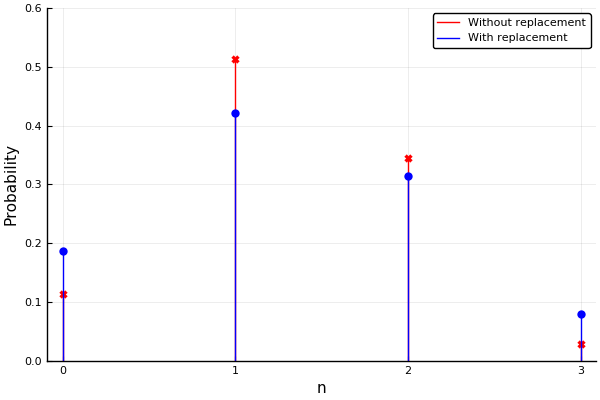

In [16]:
plot()
proportionFished(goldFish, silverFish, n, N)
proportionFished(goldFish, silverFish, n, N, true)